# Delayed tasks analysis


### Convert notebook to python
```
bash
jupyter nbconvert "D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20221201_073500_reaching_go_spout_bar_nov22.ipynb" --to="python" --output-dir="D:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical" --output="nb20221201_073500_reaching_go_spout_bar_nov22"
```

Quick analysis of instrumental reaching

In [50]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Variables

In [51]:
import pandas as pd
from pathlib import Path
trial_window = [-4000, 8000] # in ms

# time limit around trigger to perform an event determine successful trials
# timelim = [1000, 4000] # in ms useless here, to deprecate 
# in favor of computing presence of an event during certain states for success in the future

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')

# # From julien-pc
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pyphotometry\data\reaching_go_spout_bar_nov22'
pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22'

# From laptop
# photometry_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pyphotometry'
# pycontrol_dir = r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\reaching_go_spout_incr_break2_nov22'

video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [52]:
# Load all raw text sessions in the indicated folder or a sessions.pkl file
# if already existing in folder_path
exp_cohort = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=False)

Saved sessions loaded from: sessions.pkl


In [53]:
exp_cohort.sessions = [session for session in exp_cohort.sessions if (session.subject_ID == 604)]

### Perform extraction of behavioural information by trial

In [54]:
# Process the whole experimental folder by trials

trial_window = [-2000,4000]
exp_cohort.process_exp_by_trial(trial_window=trial_window, timelim=None, tasksfile=tasksfile, verbose=True)

# Save the file as sessions.pkl in folder_path
# exp_cohort.save()

processing by trial: RE604-2023-03-14-092522.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-14-093001.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-15-114819.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-16-102419.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-17-090113.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-20-094835.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-21-154547.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-22-120336.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-23-090342.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-24-091134.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-27-091207.txt task: reaching_go_spout_bar_mar23
processing by trial: RE604-2023-03-29-091133.txt task: reaching_go_spout_bar_mar23
proc

In [55]:
len(exp_cohort.sessions)

14

### df_conditions dataframe (metadata for single session)

In [56]:
exp_cohort.sessions[0].df_conditions

break_after_abort  US_end_timer  water_on  water by bar_off  \
1              False         False     False             False   
2              False         False     False             False   
3              False         False     False             False   
4              False          True      True             False   
5              False          True      True             False   
6              False          True      True             False   
7              False          True      True             False   
8              False          True      True             False   
9              False         False     False             False   

   water by spout  water for free  water success  busy_win_timer  spout  \
1           False           False          False           False  False   
2           False           False          False           False   True   
3           False           False          False           False   True   
4            True           False          False            True   True   
5            True           False          False            True   True   
6            True           False          False           False   True   
7            True           False          False            True   True   
8            True           False          False            True   True   
9           False           False          False           False   True   

   button_press  waiting_for_spout         trigger  valid  success  \
1         False               True  hold_for_water   True    False   
2         False               True  hold_for_water   True    False   
3         False               True  hold_for_water   True    False   
4         False               True  hold_for_water   True     True   
5         False               True  hold_for_water   True     True   
6         False               True  hold_for_water   True     True   
7         False               True  hold_for_water   True     True   
8         False               True  hold_for_water   True     True   
9         False               True  hold_for_water   True    False   

                         uid  
1  604_2023-03-14_09:25:22_1  
2  604_2023-03-14_09:25:22_2  
3  604_2023-03-14_09:25:22_3  
4  604_2023-03-14_09:25:22_4  
5  604_2023-03-14_09:25:22_5  
6  604_2023-03-14_09:25:22_6  
7  604_2023-03-14_09:25:22_7  
8  604_2023-03-14_09:25:22_8  
9  604_2023-03-14_09:25:22_9

### Defining conditions to categorize trials

In [57]:
# Defime each trial type as a dictionary of conditions to be met
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'valid': True, 
    'hold_timer': True, 'button_press': False, 'water by bar_off': False, 'water for free': False}

conditions_dict2 = {'trigger': 'hold_for_water', 'valid': True, 'hold_timer': False,
    'break_after_abort': True, 'US_end_timer': False, 'success': False, 'button_press': False}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
condition_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None

# Window to exctract (in ms)


### Extracting an event_dataset from an Experiment (experimental folder)

In [58]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()

c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\users\ndcn1349\onedrive - nexus365\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You

saved \\ettin\Magill_Lab\Julien\Data\head-fixed\pycontrol\reaching_go_spout_bar_nov22\sessions.pkl


c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ndcn1349\Anaconda3\envs\trialexp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## Match and synchronize photometry to behaviour

In [71]:
v_dataset = exp_cohort.behav_events_to_dataset(
    groups=None,
    conditions_list=conditions_list,
    cond_aliases=cond_aliases,
    when='all',
    task_names=['reaching_go_spout_bar_nov22'],
    trig_on_ev=None
)

ev_dataset.set_trial_window(trial_window=[-1000,4000], unit='milliseconds')
ev_dataset.set_conditions(conditions=condition_list, aliases=cond_aliases)

NameError: name 'conditions_list' is not defined

### From the whole experiment, only filter a subset of sessions

In [62]:
# reset previous filters
ev_dataset.filter_reset()

# define new filters
bool_filter = (ev_dataset.get_tfkeep_subjects([316,317,318])) & (ev_dataset.get_tfkeep_dates(
    [date(2022,12,16),
    date(2022,12,17),
    date(2022,12,18),
    date(2022,12,19),
    date(2022,12,20)]))
# get_tfkeep_dates will need to take date or time intervals as input

# apply filters to metadata_df
ev_dataset.set_keep(bool_filter)

# you can still apply additional filtering thanks to other methods like:
ev_dataset.filter_lastNsessions(5) # keep only the last 3 sessions for each subject

# We'll need to find a way to plot lines between sessions and/or indicate dates/subjects
# in y axis but that will be a bit tricky to make both flexible and easy to use/implement
ev_dataset.plot_raster(keys=['bar_off_trial_time','spout_trial_time'], module='plotly')


KeyError: 'subject_ID'

### Metadata dataframe example for an event_dataset
- Here a row is a trial, multiple sessions/animals are combined
- This what looks like metadata_df on an Event_Dataset instance combining multiple trials from multiple sessions and animals


In [1]:
print(ev_dataset.metadata_df.columns)
ev_dataset.metadata_df

NameError: name 'ev_dataset' is not defined

Note that I recently implemented uid column, common to data and metadata dataframes to make a "unique trial identifier", useful for merging with no ambiguity a data and metadata DataFrame for instance


In [ ]:
ev_dataset.metadata_df.uid.tail(5)

AttributeError: 'DataFrame' object has no attribute 'uid'

In [ ]:
ev_dataset.metadata_df.to_csv(r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs\Event_dataset_metadata_df.csv')

OSError: Cannot save file into a non-existent directory: 'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs'

### Data DataFrame for Event_Dataset
- Again this will be better as xarray later
- From interacting with other frameworks with similar issues, I came to know that if we were to keep for a while pandas, the most efficient thing to do would be to store pd.Series within each cell (instead of list or even np.array as indexing would make any apply function or other operation much faster)
- Note that, beside the meaningless index (but fast as 0 based monotonically increasing), the only shared column is now uid

In [ ]:
print(ev_dataset.data.columns)
ev_dataset.data

Index([], dtype='object')


Empty DataFrame
Columns: []
Index: []

In [ ]:
ev_dataset.data.to_csv(r'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs\Event_dataset_data.csv')

OSError: Cannot save file into a non-existent directory: 'C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\outputs'

### Behaviour: Compute distribution and optionally turn to a Continuous_Dataset
- You will note here that the structure of the data and metadata changes (maybe a bit of more consistency could be added, but the biggest difference is continous data is stored as np.ndarray with dim = trials x variables x times)


In [ ]:
dist_as_continuous = ev_dataset.compute_distribution(
        trial_window = [-1999, 10000],
        bin_size = 100, # do not work as expected with cued-uncued
        normalize = True,
        per_session = True,
        out_as_continuous = True)
dist_as_continuous.set_conditions(conditions=condition_list, aliases=cond_aliases)
# Remove test files
# dist_as_continuous.filterout_subjects([0])

KeyError: 'uid'

### Particularity of turning an event_dataset to a continous_dataset
- The above function also will yield a different output than a typical photometry session
- because we use per_session = True, which "collapse" the result of all the trials of a session into a single line for the session.
- So here we'll have one line per sessions whereas typical photometry analysis will have one line per trial
- I'll share with you how it looks normally on photometry datasets
- Actually doing that I realize that in the particular case of turning an event dataset into a continuous, outputs are kind of inconsistent (but logical). metadata_df actually contains the discrete timestamps and data is the np.ndarray containing the distribution in frequency as a continuously homegeneously sampled array defined by the binning
- This will need fixing and integration of session/trials metadata such as uid or datetime for instance

In [ ]:
print(f'dist_as_continuous.metadata_df columns: \n\n{dist_as_continuous.metadata_df.columns.values}')
print(f'\n\ndist_as_continuous.data type: {type(dist_as_continuous.data)}, shape: {dist_as_continuous.data.shape}')
dist_as_continuous.metadata_df.head()
# Remark on the data shape:
# In this particular case  trials x variables x times for the shape of the data
# turns in to  sessions x event_types(var) x timebin

NameError: name 'dist_as_continuous' is not defined

I did not exported you the metadata as a csv for this one as i think it is confusing since it looks like event metadata.


### Using the continously sampled distribution to plot below
- heatmap has been recently implemented and lack a tons of details and options
- make one figure by animal, aggreagating all the sessions
- columns are the different trial "conditions" or type
- subplot lines are different events distribution

In [ ]:
dist_as_continuous.heatmap(
    vars = ['bar_off_dist', 'spout_dist', 'US_end_timer_dist'],
    time_lim = [-1000, 8000],
    colormap = 'jet'
)

NameError: name 'dist_as_continuous' is not defined

### Optional methods

- Implementation of these optional filtering options is first understood as removing subjects, groups, conditions...
- It is a non-permanent way of discarding elements for analysis
- It is based on a "keep" column in the metadata that is True by default and set to False with the filtering function.
- At anytime, <trial_dataset>.filter_reset() can be called to re-include all the elements in the analysis (set all "keep" to True)
- Comment or uncomment lines and fill the lists according to your needs

In [ ]:
# Get a list of the groups
dist_as_continuous.get_groups()
# Get a list of the variables
dist_as_continuous.get_col_names()

# reset previous filtering of the dataset
dist_as_continuous.filter_reset()

# exclude some conditions by IDs
# dist_as_continuous.filter_out_conditions([])

# # exclude some groups by IDs
# dist_as_continuous.filter_out_groups([])

# exclude some subjects
dist_as_continuous.filterout_subjects([313,314,315])
#     subjects_IDs_to_exclude = [289, 290, 293, 294, 295, 299, 301, 303, 304, 305, 306])
dist_as_continuous.filter_lastNsessions(3)
# dist_as_continuous.filterout_dates([])

# filter subjects/sessions with less than x trials (by condition)
# dist_as_continuous.filter_min(min_trials = 1)

# To remove subjects who do not have trials
# in all the conditions, if called after filter_min(),
# will discard any subject who do not have the minimum number
# of trials in all the conditions

# dist_as_continuous.filter_if_not_in_all_cond()


Behaviour: Plot distribution

False    42
True     26
Name: keep, dtype: int64

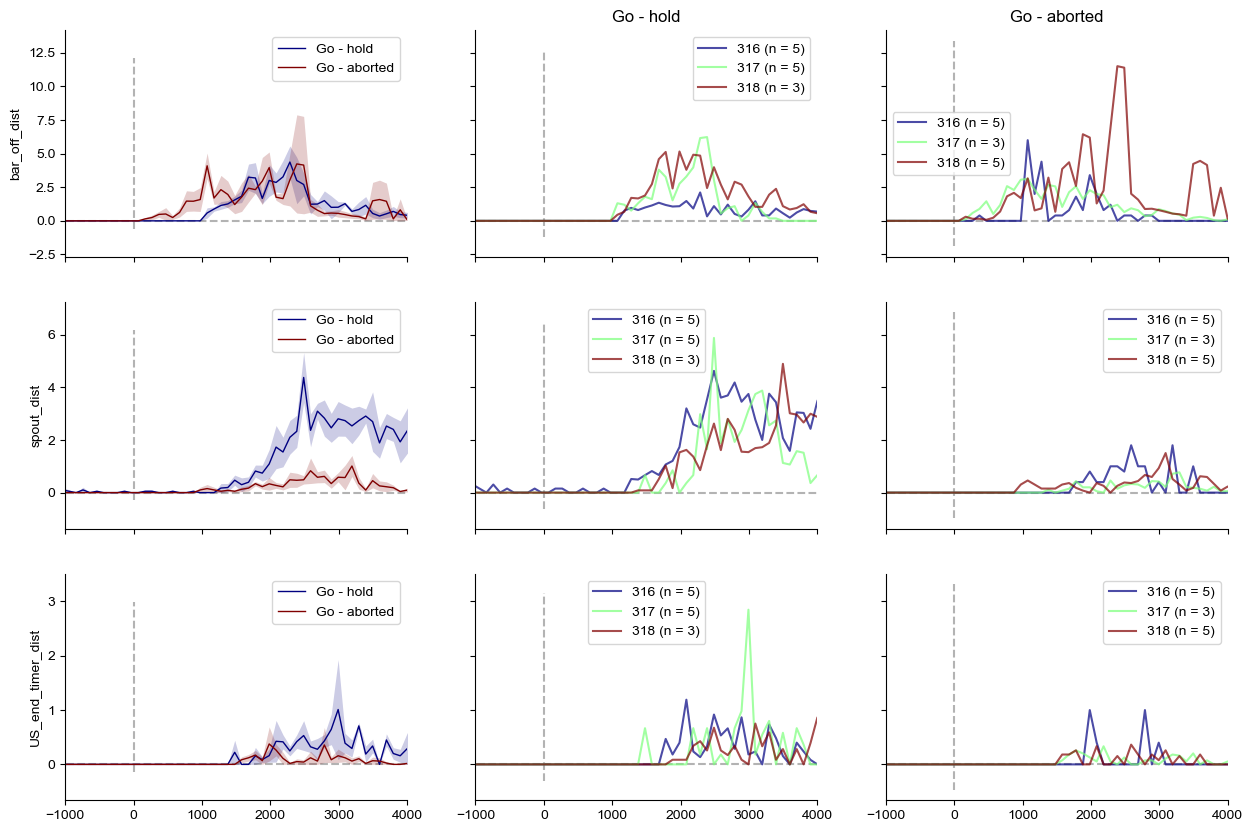

In [ ]:
dist_as_continuous.filter_reset()
dist_as_continuous.filter_lastNsessions(n = 5)
dist_as_continuous.lineplot(
    vars = [ 'bar_off_dist','spout_dist','US_end_timer_dist'],
    time_lim = [-1000,4000],
    error = True,
    ylim = None,#[[-0.1,1.6]], #[[-0.1, 0.7]], #[[-0.1, 1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
    colormap = 'jet',
    legend = True,
    plot_subjects = True,
    plot_groups = True,
    figsize = (15,10),
    dpi = 100,
    verbose = False)
# Return a count of overall number of trials
dist_as_continuous.metadata_df['keep'].value_counts()


## Match and synchronize photometry to behaviour

In [ ]:
# Find if there is a matching photometry file:
exp_cohort.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort.sync_photometry_files(2)
exp_cohort.save()


c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
c:\users\phar0732\documents\github\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)


saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\sessions.pkl


In [ ]:
# exp_cohort.match_sessions_to_files(video_dir, ext='mp4')
# exp_cohort.match_sessions_to_files(video_dir, ext='h5')

In [ ]:
exp_cohort.save('20230131_sample_delayed_sessions')

saved C:\Users\phar0732\Documents\GitHub\trialexp\sample_data\pycontrol\20230131_sample_delayed_sessions.pkl


Loop to plot photometry trials triggered on different events
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]

photo_dataset = dict()
for idx, trig in enumerate(trigs):
    photo_dataset[idx] = exp_cohort.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = condition_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_nov22','reaching_go_spout_bar_nov22', 'reaching_go_spout_bar_dual_dec22' ,'reaching_go_spout_bar_dual_all_reward_dec22'],
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            high_pass = None, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1','analog_1_filt','analog_2','analog_2_filt','analog_1_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = False) # will plot all the process of remove_artifacts if remove_artifacts == True



No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 318 at: 2022-12-08 14:29:10
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial in any condition for subject 317 at: 2022-12-15 14:55:30
No trial in any condition for subject 317 at: 2022-12-16 17:42:18
No trial in any condition for subject 316 at: 2022-12-08 12:55:51
No trial in any condition for subject 316 at: 2022-12-08 14:26:30
No trial i

Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

In [ ]:

bad_days = photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()[-3:]
bad_days = [pd.to_datetime(bad_day) for bad_day in bad_days]
photo_dataset[0].metadata_df[photo_dataset[0].metadata_df.subject_ID == 316].datetime.unique()

array(['2022-12-08T12:55:51.000000000', '2022-12-08T14:26:30.000000000',
       '2022-12-08T14:30:46.000000000', '2022-12-09T17:19:25.000000000',
       '2022-12-11T20:26:00.000000000', '2022-12-17T11:10:37.000000000',
       '2022-12-19T09:42:41.000000000', '2022-12-19T11:15:41.000000000'],
      dtype='datetime64[ns]')

cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316
cond_ID: 1, group_idx 0, subj 316
cond_ID: 0, group_idx 0, subj 316


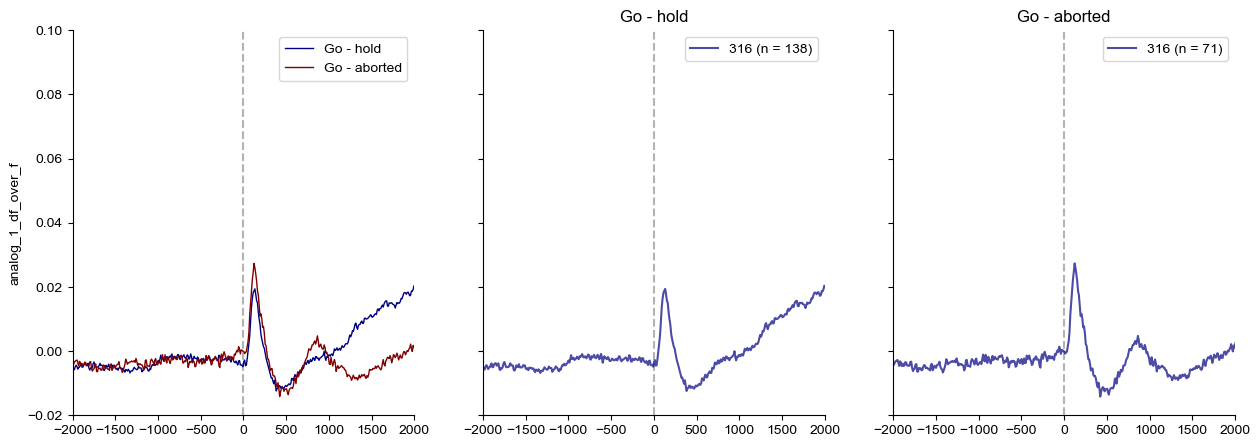

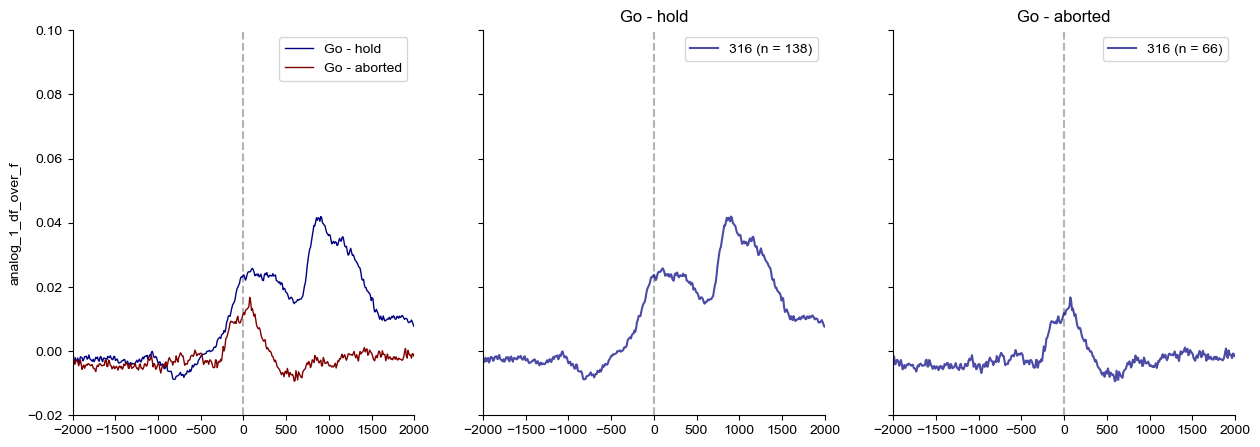

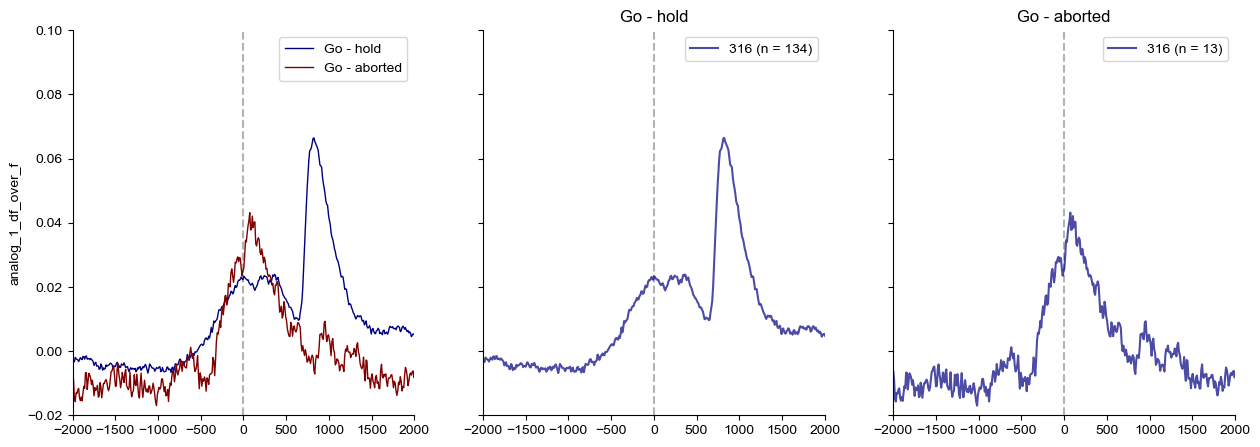

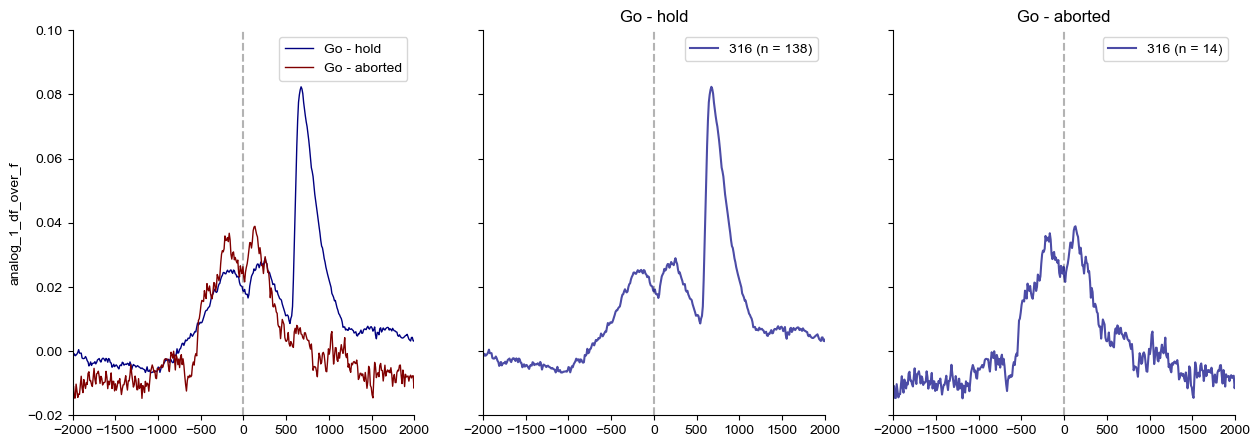

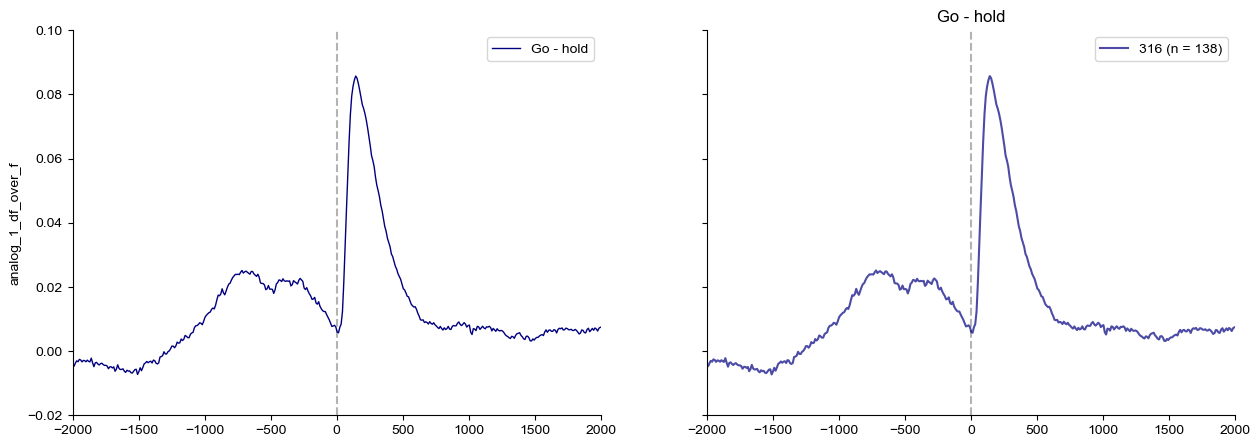

In [ ]:

for idx, trig in enumerate(trigs):

    # keep only 316
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 5)
    if idx == 4:
        photo_dataset[idx].filterout_conditions(1)
    photo_dataset[idx].lineplot(
        vars = ['analog_1_df_over_f'],
        time_lim = [-2000, 2000],
        # time_unit = 'seconds',
        ylim = [[-0.02, 0.10]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = (15, 5),
        dpi = 100,
        verbose = True)

Same plot, heatmap version:

- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

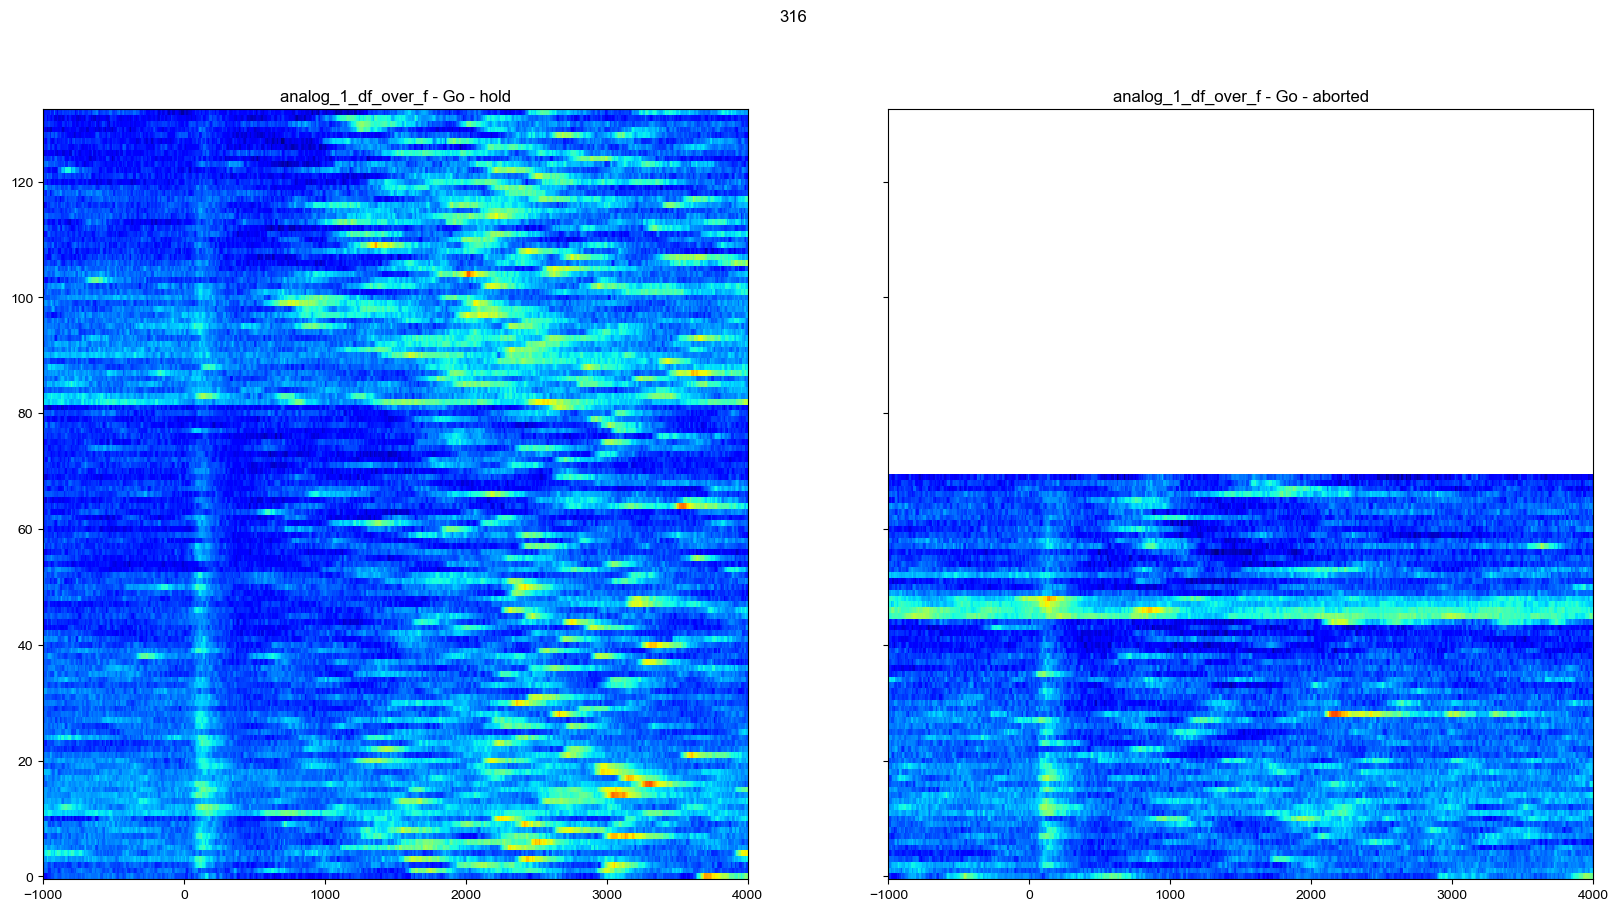

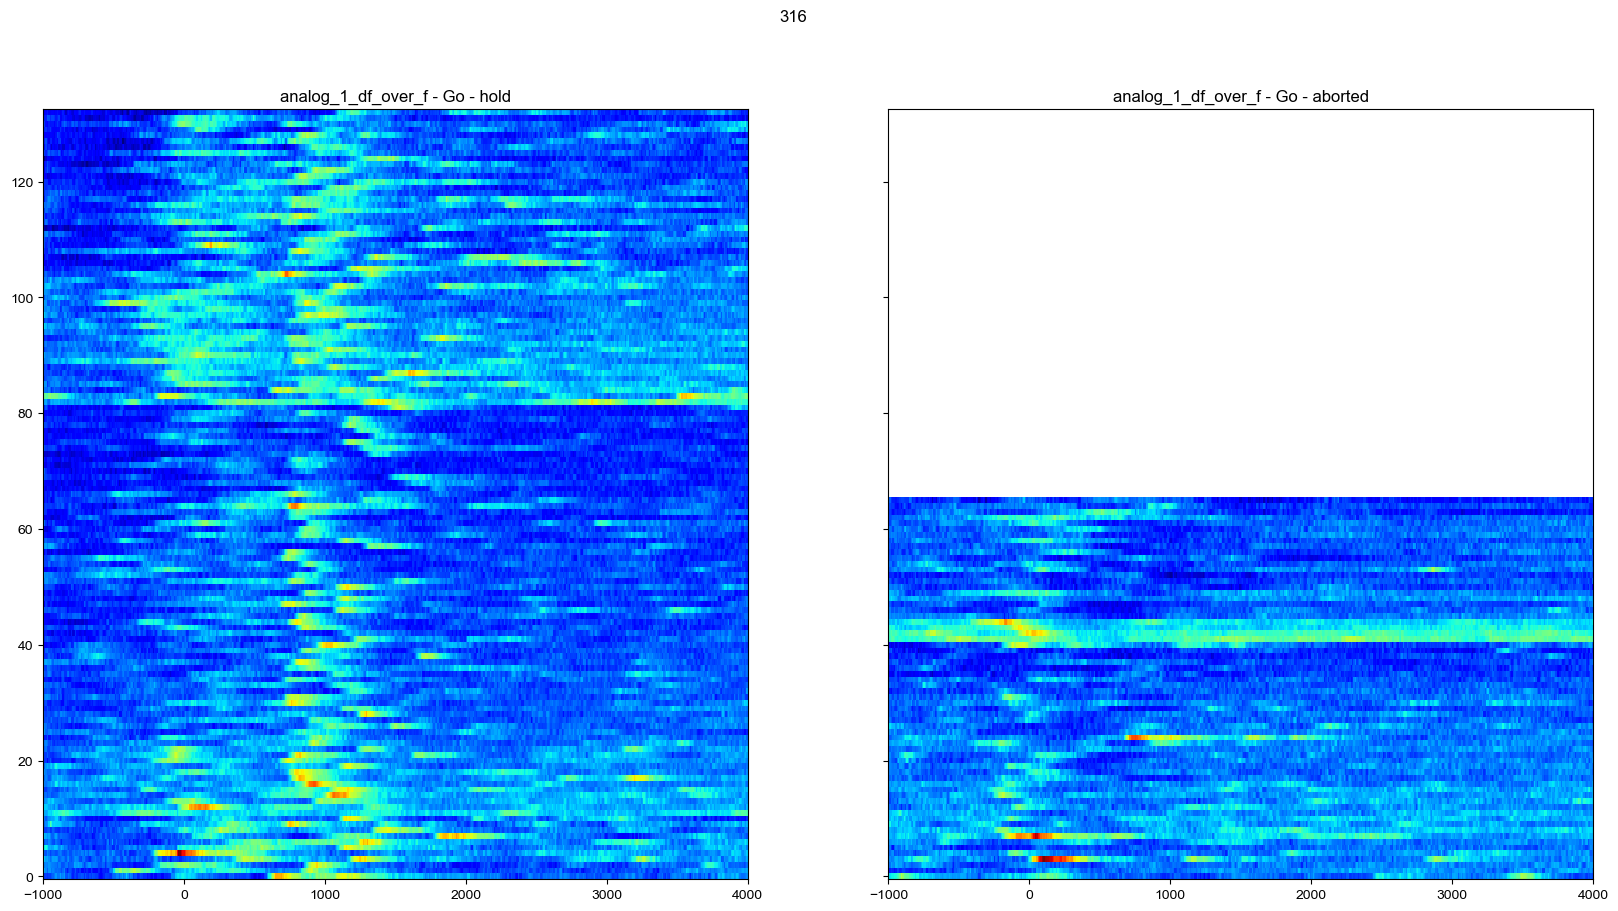

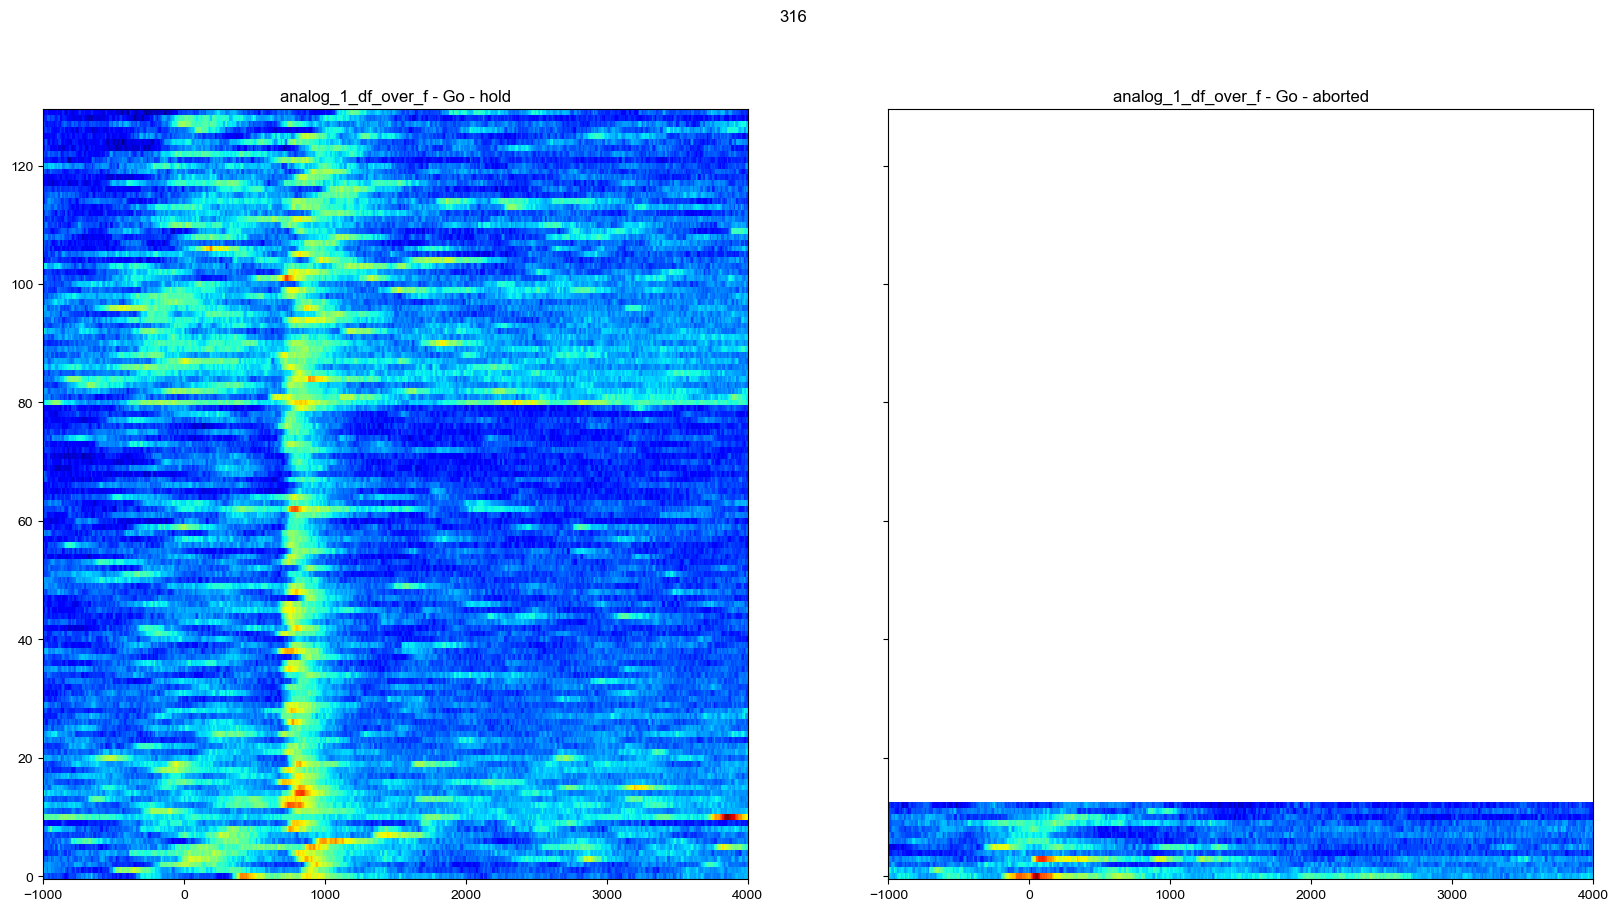

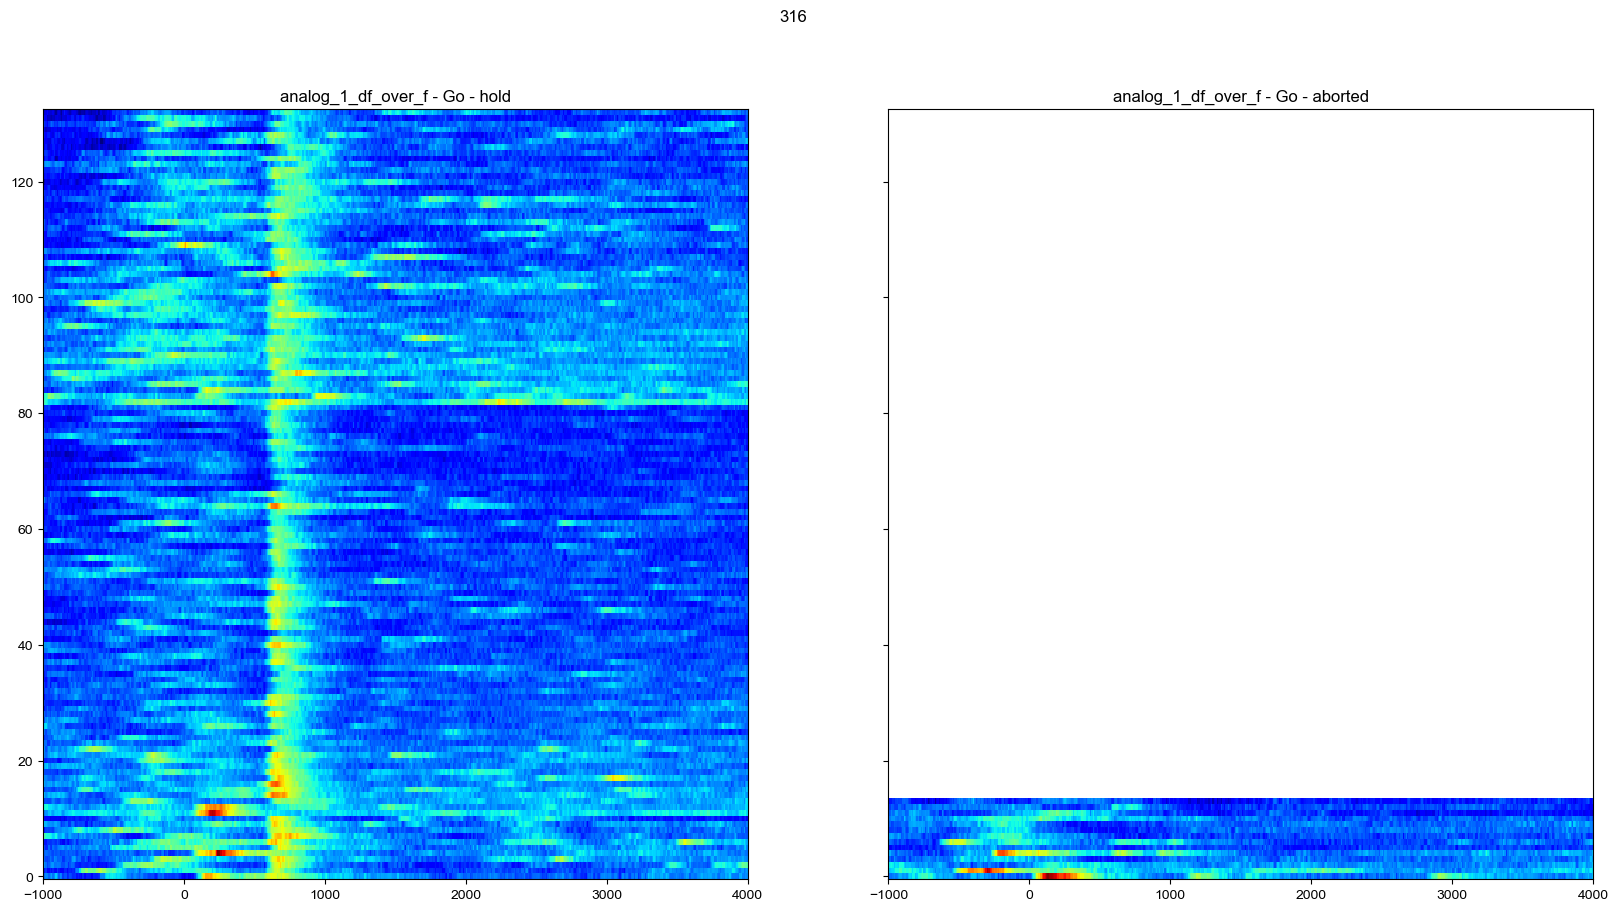

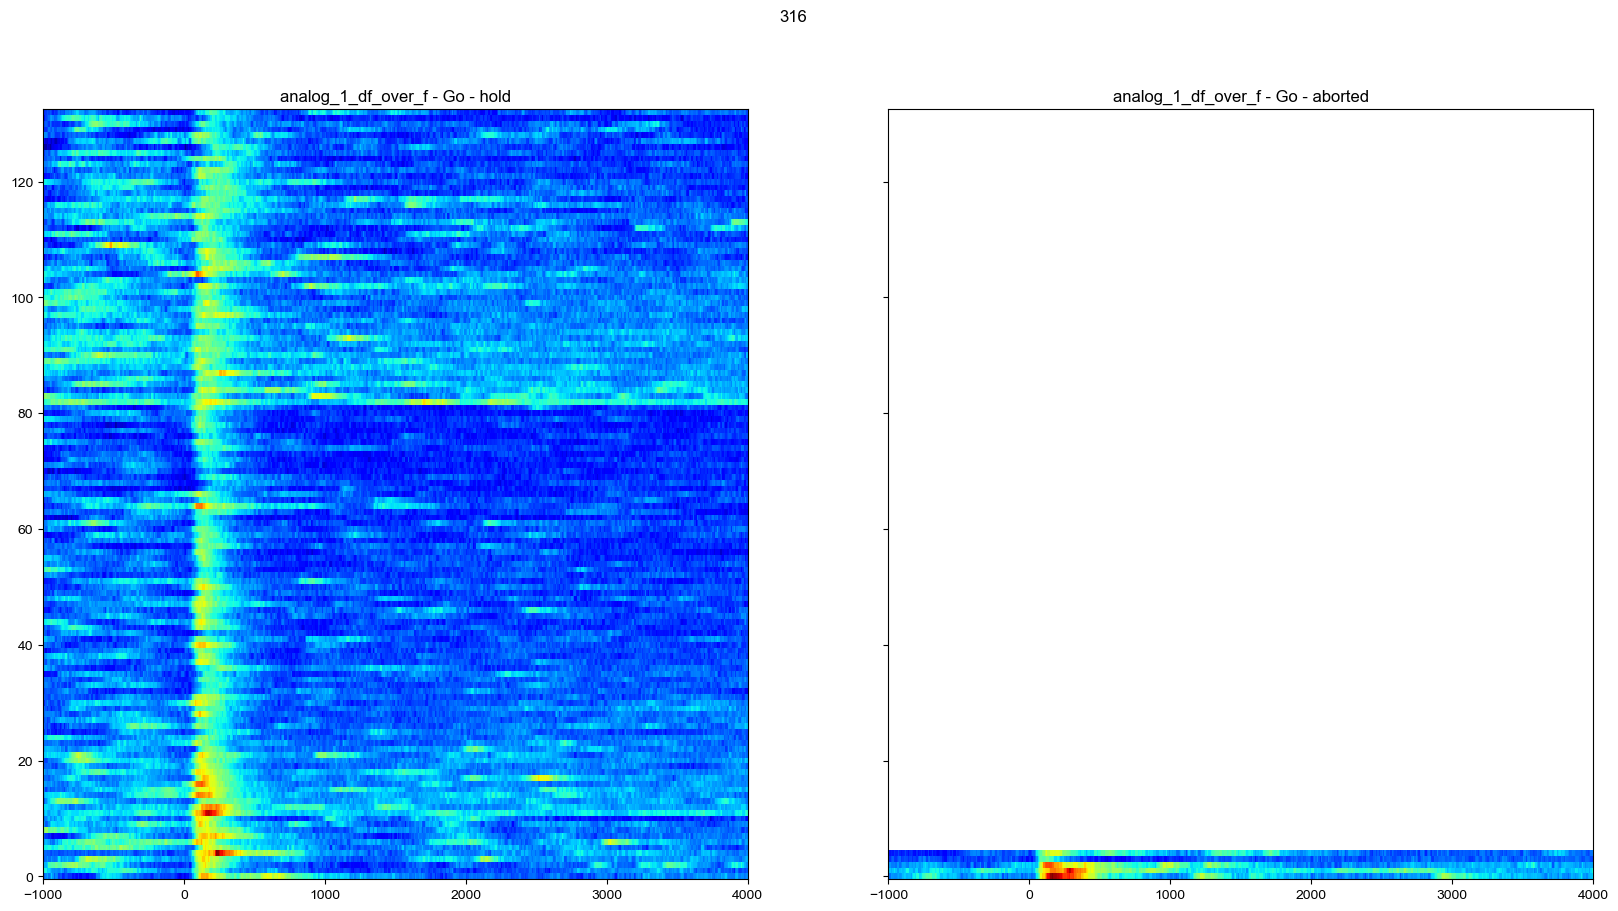

In [ ]:
for idx, trig in enumerate(trigs):
    photo_dataset[idx].filter_reset()
    photo_dataset[idx].filterout_subjects([0,1,313,314,317,318])
    photo_dataset[idx].filterout_dates(bad_days)
    photo_dataset[idx].filter_lastNsessions(n = 10)
    photo_dataset[idx].heatmap(
        vars = ['analog_1_df_over_f'],
        time_lim = [-1000, 4000],
        clim_pctile = None,
        colormap = 'jet'
    )   
    photo_dataset[idx].filter_reset()

In [ ]:
bad_days[-1]


Timestamp('2022-12-19 11:15:41')

In [ ]:
rec_day_meta = photo_dataset[0].metadata_df[(photo_dataset[0].metadata_df.subject_ID == 316)
    & (photo_dataset[0].metadata_df.datetime == bad_days[-1])]
rec_day_meta

subject_ID            datetime  \
219        316 2022-12-19 11:15:41   
220        316 2022-12-19 11:15:41   
221        316 2022-12-19 11:15:41   
222        316 2022-12-19 11:15:41   
223        316 2022-12-19 11:15:41   
224        316 2022-12-19 11:15:41   
225        316 2022-12-19 11:15:41   
226        316 2022-12-19 11:15:41   
227        316 2022-12-19 11:15:41   
228        316 2022-12-19 11:15:41   
229        316 2022-12-19 11:15:41   
230        316 2022-12-19 11:15:41   
231        316 2022-12-19 11:15:41   
232        316 2022-12-19 11:15:41   
233        316 2022-12-19 11:15:41   
234        316 2022-12-19 11:15:41   
235        316 2022-12-19 11:15:41   
236        316 2022-12-19 11:15:41   
237        316 2022-12-19 11:15:41   
238        316 2022-12-19 11:15:41   
239        316 2022-12-19 11:15:41   
240        316 2022-12-19 11:15:41   
241        316 2022-12-19 11:15:41   
242        316 2022-12-19 11:15:41   
243        316 2022-12-19 11:15:41   
244        316 2022-12-19 11:15:41   
245        316 2022-12-19 11:15:41   
246        316 2022-12-19 11:15:41   

                                       task_name condition_ID trial_nb  \
219  reaching_go_spout_bar_dual_all_reward_dec22            0        1   
220  reaching_go_spout_bar_dual_all_reward_dec22            0       30   
221  reaching_go_spout_bar_dual_all_reward_dec22            0       37   
222  reaching_go_spout_bar_dual_all_reward_dec22            0       40   
223  reaching_go_spout_bar_dual_all_reward_dec22            0       49   
224  reaching_go_spout_bar_dual_all_reward_dec22            0       64   
225  reaching_go_spout_bar_dual_all_reward_dec22            0       66   
226  reaching_go_spout_bar_dual_all_reward_dec22            0       79   
227  reaching_go_spout_bar_dual_all_reward_dec22            0       87   
228  reaching_go_spout_bar_dual_all_reward_dec22            0       93   
229  reaching_go_spout_bar_dual_all_reward_dec22            0      108   
230  reaching_go_spout_bar_dual_all_reward_dec22            0      112   
231  reaching_go_spout_bar_dual_all_reward_dec22            0      132   
232  reaching_go_spout_bar_dual_all_reward_dec22            0      136   
233  reaching_go_spout_bar_dual_all_reward_dec22            0      141   
234  reaching_go_spout_bar_dual_all_reward_dec22            0      144   
235  reaching_go_spout_bar_dual_all_reward_dec22            0      146   
236  reaching_go_spout_bar_dual_all_reward_dec22            0      153   
237  reaching_go_spout_bar_dual_all_reward_dec22            0      156   
238  reaching_go_spout_bar_dual_all_reward_dec22            0      162   
239  reaching_go_spout_bar_dual_all_reward_dec22            0      165   
240  reaching_go_spout_bar_dual_all_reward_dec22            0      167   
241  reaching_go_spout_bar_dual_all_reward_dec22            0      176   
242  reaching_go_spout_bar_dual_all_reward_dec22            1       14   
243  reaching_go_spout_bar_dual_all_reward_dec22            1       31   
244  reaching_go_spout_bar_dual_all_reward_dec22            1       50   
245  reaching_go_spout_bar_dual_all_reward_dec22            1       77   
246  reaching_go_spout_bar_dual_all_reward_dec22            1      147   

     session_nb  group_ID  keep  trial_ID  
219          15         0  True       219  
220          15         0  True       220  
221          15         0  True       221  
222          15         0  True       222  
223          15         0  True       223  
224          15         0  True       224  
225          15         0  True       225  
226          15         0  True       226  
227          15         0  True       227  
228          15         0  True       228  
229          15         0  True       229  
230          15         0  True       230  
231          15         0  True       231  
232          15         0  True       232  
233          15         0  True       233  
234          15         0  True       234  
235   